In [9]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
start_date = datetime.datetime(2012,4,12)
end_date = datetime.datetime(2022,5,12)

In [52]:
spy = web.DataReader("SPY",'yahoo',start_date,end_date)
voo = web.DataReader("VOO",'yahoo',start_date,end_date)
ivv = web.DataReader("IVV",'yahoo',start_date,end_date)
spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-04-11,137.539993,136.750000,137.289993,137.000000,154133000.0,113.264915
2012-04-12,138.899994,137.029999,137.130005,138.789993,154321500.0,114.744804
2012-04-13,138.820007,137.009995,138.470001,137.139999,169246700.0,113.380646
2012-04-16,138.039993,136.580002,137.839996,137.050003,147825300.0,113.306244
2012-04-17,139.360001,137.699997,137.839996,139.080002,147877600.0,114.984520


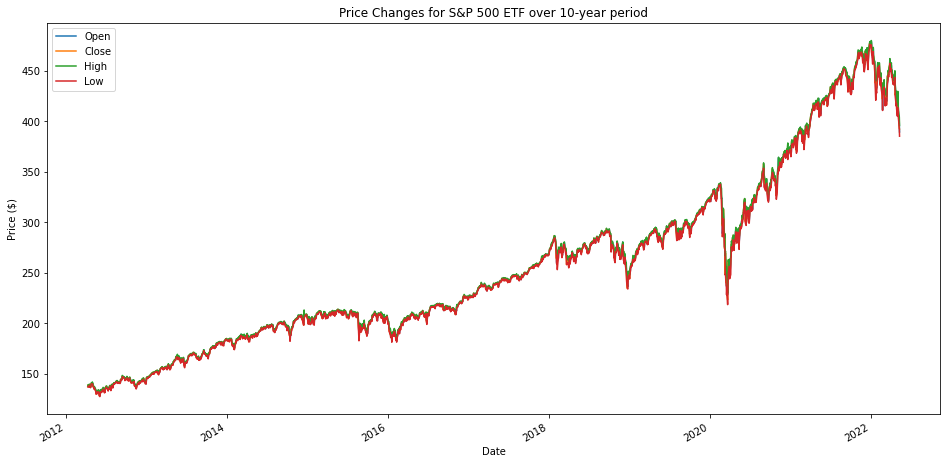

In [55]:
spy["Open"].plot(label='Open',figsize = (16,8))
spy["Close"].plot(label='Close')
spy["High"].plot(label='High')
spy["Low"].plot(label='Low')
plt.title('Price Changes for S&P 500 ETF over 10-year period')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

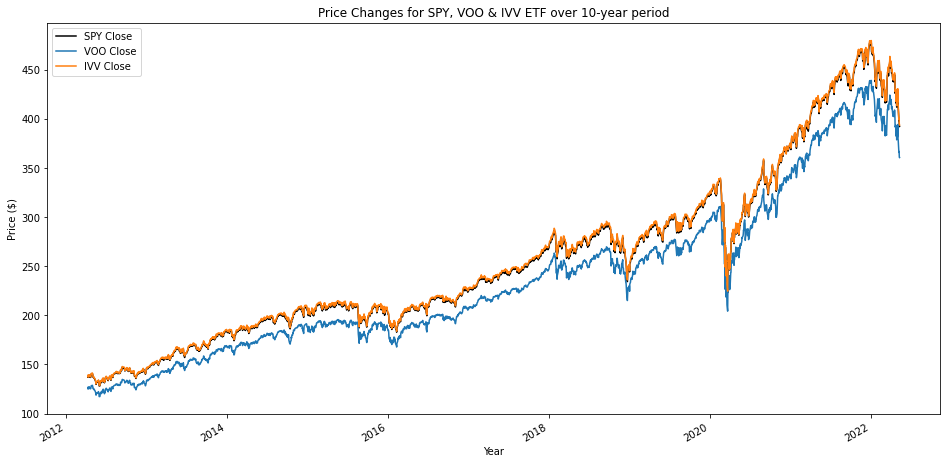

In [26]:
spy['Close'].plot(label = 'SPY Close',figsize = (16,8),color ='black')
voo['Close'].plot(label = 'VOO Close')
ivv['Close'].plot(label = 'IVV Close')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.title('Price Changes for SPY, VOO & IVV ETF over 10-year period')
plt.legend()
plt.show()

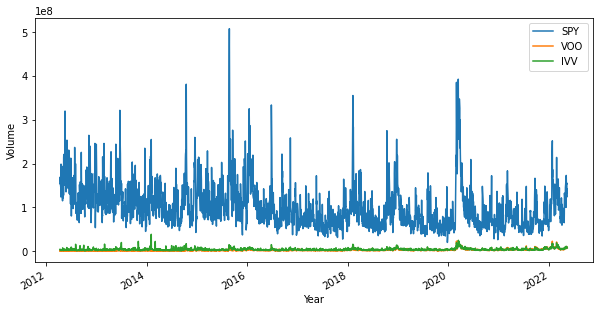

In [60]:
spy['Volume'].plot(label = 'SPY',figsize = (10,5))
voo['Volume'].plot(label = 'VOO')
ivv['Volume'].plot(label = 'IVV')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend()
plt.show()


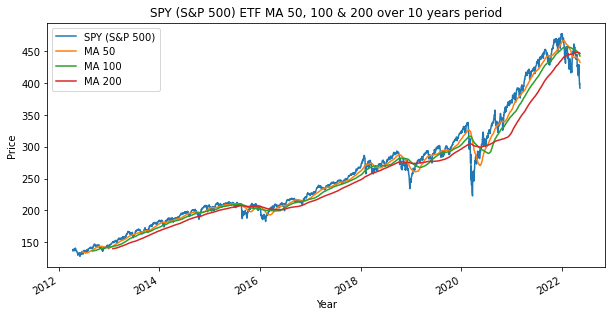

In [62]:
spy['Close'].plot(label = 'SPY (S&P 500)',figsize = (10,5))
spy['MA50'] = spy['Close'].rolling(50).mean()
spy['MA50'].plot(label = 'MA 50')
spy['MA100'] = spy['Close'].rolling(100).mean()
spy['MA100'].plot(label = 'MA 100')
spy['MA200'] = spy['Close'].rolling(200).mean()
spy['MA200'].plot(label = 'MA 200')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('SPY (S&P 500) ETF MA 50, 100 & 200 over 10 years period')
plt.legend()
plt.show()

In [63]:
spy['Returns'] = (spy['Close']/spy['Close'].shift(1))-1
voo['Returns'] = (voo['Close']/voo['Close'].shift(1))-1
ivv['Returns'] = (ivv['Close']/ivv['Close'].shift(1))-1
spy.head()

,High,Low,Open,Close,Volume,Adj Close,MA50,MA100,MA200,Returns
Date,,,,,,,,,,
2012-04-11,137.539993,136.750000,137.289993,137.000000,154133000.0,113.264915,NaN,NaN,NaN,NaN
2012-04-12,138.899994,137.029999,137.130005,138.789993,154321500.0,114.744804,NaN,NaN,NaN,0.013066
2012-04-13,138.820007,137.009995,138.470001,137.139999,169246700.0,113.380646,NaN,NaN,NaN,-0.011888
2012-04-16,138.039993,136.580002,137.839996,137.050003,147825300.0,113.306244,NaN,NaN,NaN,-0.000656
2012-04-17,139.360001,137.699997,137.839996,139.080002,147877600.0,114.984520,NaN,NaN,NaN,0.014812


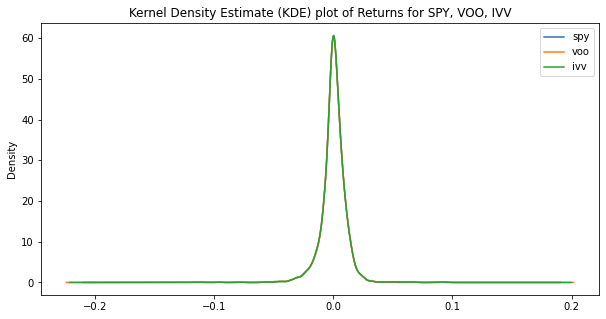

In [64]:
spy['Returns'].plot(kind ='kde',label='spy',figsize = (10,5))
voo['Returns'].plot(kind ='kde',label='voo')
ivv['Returns'].plot(kind ='kde',label='ivv')
plt.title('Kernel Density Estimate (KDE) plot of Returns for SPY, VOO, IVV')
plt.legend()